**Link Cides**: https://github.com/akshaysharma096/Siamese-Networks/blob/master/Few%20Shot%20Learning%20-%20V1.ipynb </br>
**Link paper**: https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

# Few short learning with Siamese Networks



> This notebook tries to classify images using Siamese Networks proposed by Gregory et. al, in his paper Siamese Neural Networks for One-shot Image Recognition, to solve the One shot learning problem.



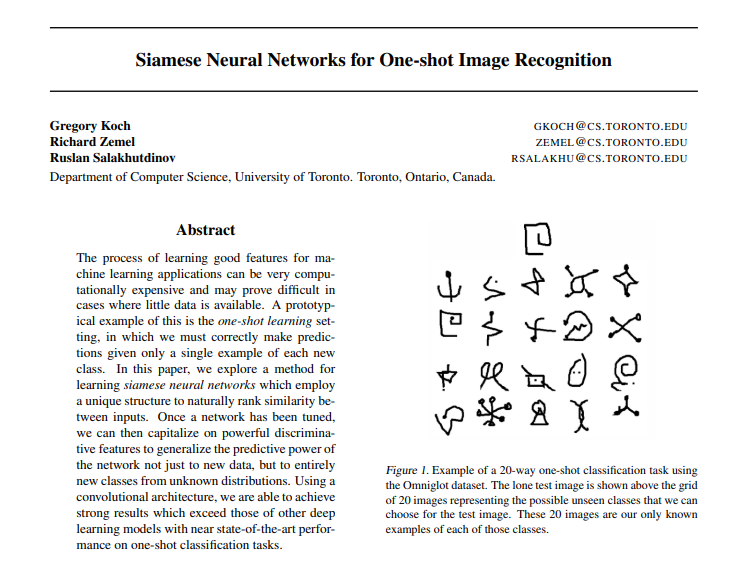

# Atuação

* **Aplicação** do código de one-shot learning utilizando Omniglot (**Cides**)

* **Atualização**: Substituição e atualização de bibliotecas que foram descontinuadas.

* **Kaggle**: Teste no ambiente Kaggle.

* **Keras & TensorFlow**: Para construção e treinamento da rede neural.

* **Rede Neural Siamesa**: Arquitetura chave para tarefas de one-shot learning.
Camadas Conv2D, MaxPooling2D, Flatten, Dense.

* **Regularização L2 e Learning rate**

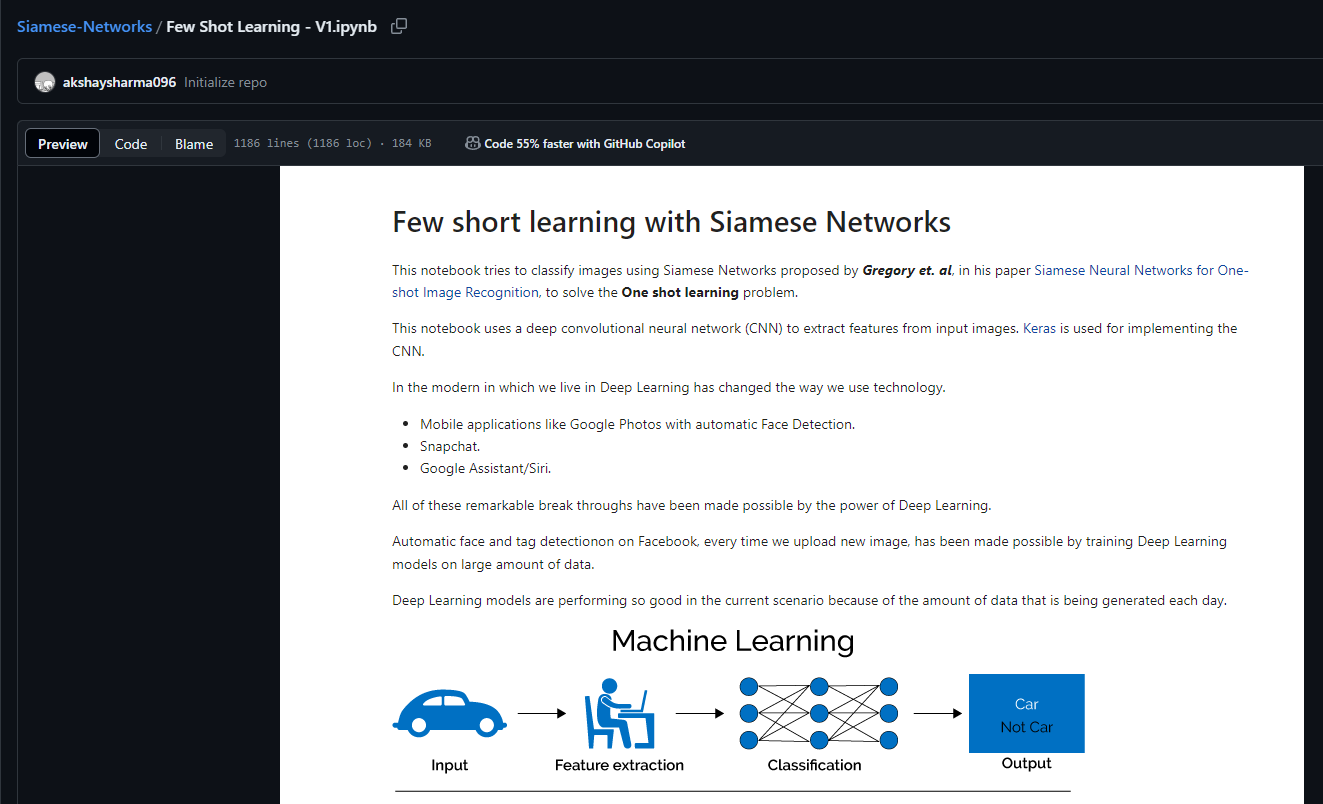

# Dificuldades e Desafios

* **Iterações**: Compreender a quantidade de iterações do código original (20.000) versus teste atual (100).

* **Compreensão de funções**: Entender o funcionamento da classe e outras funções utilizadas.

* **Depreciação de Funções**: Atualização para métodos compatíveis com versões atuais.

* **Balanceamento de Pares Positivos e Negativos**

* **Otimização do Modelo**: Ajuste fino de hiperparâmetros para melhorar a performance.

* **Generalização**: Desafio de manter alta performance em novos pares ou alfabetos.

# Próximos Passos e Melhorias

* **Atualização para APIs Mais Recentes**: Como tf.data para carregamento de dados e outras que já estão desatualizadas.

* **Exploração de Novas Arquiteturas**: Testar variantes como ResNet ou EfficientNet.

* **Técnicas de Data Augmentation**: Para aumentar a robustez do modelo.

* **Funcionamento de Redes Neurais Siamesas**.

* **Técnicas de Regularização e Inicialização de Pesos**.

* **Métricas de Avaliação para One-shot Learning**.



# Código

In [ ]:
# Import Keras and other Deep Learning dependencies
from keras.models import Sequential
import time
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, BatchNormalization, MaxPooling2D, AveragePooling2D, Concatenate, Lambda, Flatten, Dense, Layer
from keras.models import Model
import seaborn as sns
# from keras.layers.Normalization import BatchNormalization               MUDOU COM VERSÃO ATUALIZADA
# from keras.layers.pooling import
# from keras.layers.merge import Concatenate
# from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import *
# from keras.engine.topology import Layer
from keras import backend as K
from keras.regularizers import l2
K.set_image_data_format('channels_last')
import cv2
import os
import sys
from skimage import io
import numpy as np
from numpy import genfromtxt
import pandas as pd
import tensorflow as tf
import numpy.random as rng
from sklearn.utils import shuffle

%matplotlib inline
%load_ext autoreload
%reload_ext autoreload

np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(threshold=np.nan)



##### PRECISA ARRUMAR
# from fr_utils import *
# from inception_blocks_v2 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Check whether GPU is being or not
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16669818361837014335
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14363256443623879993
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# load_data.py
import sys
import numpy as np

'''
imread function from scipy.misc module is deprecated and removed in newer versions of SciPy.
This function was commonly used for reading images, but it's no longer available in recent versions.

To resolve this issue: libraries like imageio or opencv for reading images.
'''
# from scipy.misc import imread


import cv2
import pickle
import os
import matplotlib.pyplot as plt

"""Script to preprocess the omniglot dataset and pickle it into an array that's easy
    to index my character type"""

data_path = os.path.join('/content/sample_data/')
train_folder = os.path.join(data_path,'images_background')
valpath = os.path.join(data_path,'images_evaluation')

save_path = '/content/sample_data/'

lang_dict = {}



def loadimgs(path,n=0):
    #if data not already unzipped, unzip it.
    if not os.path.exists(path):
        print("unzipping")
        os.chdir(data_path)
        os.system("unzip {}".format(path+".zip" ))
    X=[]
    y = []
    cat_dict = {}
    lang_dict = {}
    curr_y = n
    #we load every alphabet seperately so we can isolate them later
    for alphabet in os.listdir(path):
        print("loading alphabet: " + alphabet)
        lang_dict[alphabet] = [curr_y,None]
        alphabet_path = os.path.join(path,alphabet)
        #every letter/category has it's own column in the array, so  load seperately
        for letter in os.listdir(alphabet_path):
            cat_dict[curr_y] = (alphabet, letter)
            category_images=[]
            letter_path = os.path.join(alphabet_path, letter)
            for filename in os.listdir(letter_path):
                image_path = os.path.join(letter_path, filename)
                # image = imread(image_path)   NÃO FUNCIONA MAIS
                image = cv2.imread(image_path)
                category_images.append(image)
                y.append(curr_y)
            try:
                X.append(np.stack(category_images))
            #edge case  - last one
            except ValueError as e:
                print(e)
                print("error - category_images:", category_images)
            curr_y += 1
            lang_dict[alphabet][1] = curr_y - 1
    y = np.vstack(y)
    X = np.stack(X)
    return X,y,lang_dict

X,y,c=loadimgs(train_folder)


with open(os.path.join(save_path,"train.pickle"), "wb") as f:
	pickle.dump((X,c),f)


X,y,c=loadimgs(valpath)
with open(os.path.join(save_path,"val.pickle"), "wb") as f:
	pickle.dump((X,c),f)

unzipping
loading alphabet: Anglo-Saxon_Futhorc
loading alphabet: Braille
loading alphabet: Hebrew
loading alphabet: N_Ko
loading alphabet: Sanskrit
loading alphabet: Gujarati
loading alphabet: Armenian
loading alphabet: Korean
loading alphabet: Asomtavruli_(Georgian)
loading alphabet: Futurama
loading alphabet: Malay_(Jawi_-_Arabic)
loading alphabet: Early_Aramaic
loading alphabet: Burmese_(Myanmar)
loading alphabet: Grantha
loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
loading alphabet: Mkhedruli_(Georgian)
loading alphabet: Arcadian
loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
loading alphabet: Japanese_(hiragana)
loading alphabet: Bengali
loading alphabet: Japanese_(katakana)
loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
loading alphabet: Syriac_(Estrangelo)
loading alphabet: Greek
loading alphabet: Cyrillic
loading alphabet: Tagalog
loading alphabet: Latin
loading alphabet: Alphabet_of_the_Magi
loading alphabet: Balinese
loading alphabet: Ti

In [ ]:
X.shape, y.shape # Esses são apenas valores do val

((659, 20, 105, 105, 3), (13180, 1))

In [ ]:
c # Esses são apenas valores do val

{'Aurek-Besh': [0, 25],
 'Mongolian': [26, 55],
 'Oriya': [56, 101],
 'ULOG': [102, 127],
 'Syriac_(Serto)': [128, 150],
 'Atemayar_Qelisayer': [151, 176],
 'Ge_ez': [177, 202],
 'Kannada': [203, 243],
 'Avesta': [244, 269],
 'Atlantean': [270, 295],
 'Old_Church_Slavonic_(Cyrillic)': [296, 340],
 'Gurmukhi': [341, 385],
 'Tengwar': [386, 410],
 'Malayalam': [411, 457],
 'Keble': [458, 483],
 'Manipuri': [484, 523],
 'Sylheti': [524, 551],
 'Glagolitic': [552, 596],
 'Angelic': [597, 616],
 'Tibetan': [617, 658]}

In [ ]:
os.path

<module 'posixpath' from '/usr/lib/python3.10/posixpath.py'>

In [ ]:
# data_path = os.path.join('data/')
# train_folder = os.path.join(data_path,'images_background')
# valpath = os.path.join(data_path,'images_evaluation')

In [ ]:
base_class_name = 'character'

In [ ]:
img = cv2.imread('/content/sample_data/images_background/Sanskrit/character11/0861_06.png')
# print("Each image in the data set has a same of {0}".format(img.shape))
print(f'Cada imagem no dataset possui o shape de {img.shape}')

# print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
flattened_img = img.flatten()
print(f'Número de features das imagens é: {flattened_img.shape[0]}')

Cada imagem no dataset possui o shape de (105, 105, 3)
Número de features das imagens é: 33075


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]
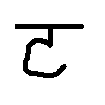

In [ ]:
img

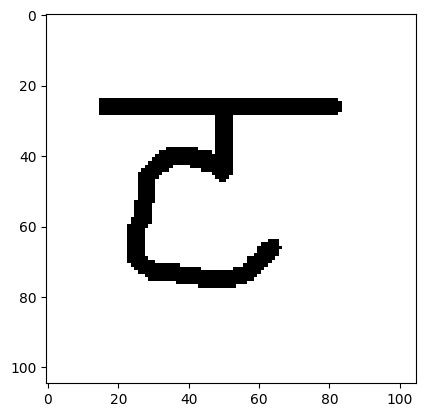

In [ ]:
imgplot = plt.imshow(img)
plt.show()

105 * 105 = **11.025** </br>
11.025 * 3 = **33.075**

In [ ]:
train_folder

'/content/sample_data/images_background'

In [ ]:
def gen_class_names(base_class_name):
    classes = []
    for i in range(1,21):
        if i < 10:
            classes.append("{0}0{1}".format(base_class_name, i))
        else:
            classes.append("{0}{1}".format(base_class_name, i))
    return classes

In [ ]:
classes = gen_class_names(base_class_name)

In [ ]:
classes

['character01',
 'character02',
 'character03',
 'character04',
 'character05',
 'character06',
 'character07',
 'character08',
 'character09',
 'character10',
 'character11',
 'character12',
 'character13',
 'character14',
 'character15',
 'character16',
 'character17',
 'character18',
 'character19',
 'character20']

In [ ]:
def generate_one_hot_encoding(classes):
    encoder = LabelBinarizer()
    transfomed_labels = encoder.fit_transform(classes)
    return transfomed_labels

In [ ]:
labels = generate_one_hot_encoding(classes)
labels

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

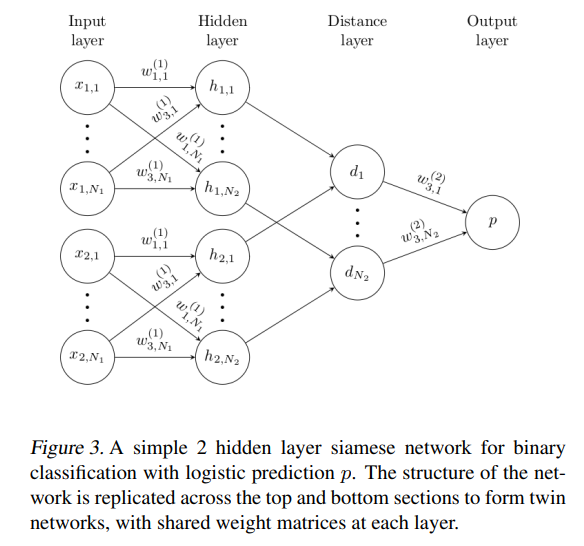

In LeCun et al., the authors used a contrastive energy function which contained dual terms to decrease the energy of
like pairs and increase the energy of unlike pairs (2005).
However, in this paper we use the weighted L1 distance
between the twin feature vectors h1 and h2 combined with
a sigmoid activation, which maps onto the interval [0, 1].
Thus a cross-entropy objective is a natural choice for training the network

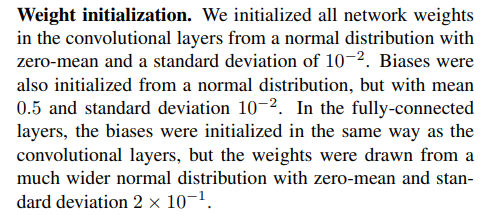

In [ ]:
def initialize_weights(shape, name=None, **kwargs):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

<ipython-input-22-d33dc261cfaf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights)


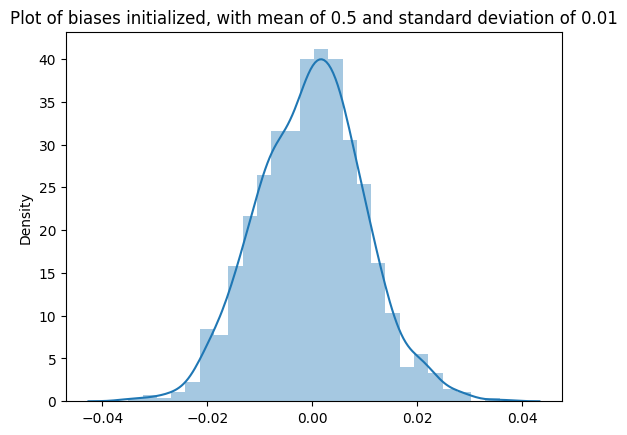

In [ ]:
# Intialize bias with mean 0.0 and standard deviation of 10^-2
weights = initialize_weights((1000,1))
sns.distplot(weights)
# plt.title("Plot of weights initialized, with mean of 0.0 and standard deviation of 0.01")
plt.title("Plot of biases initialized, with mean of 0.5 and standard deviation of 0.01")
plt.show()

In [ ]:
def initialize_bias(shape, name=None, **kwargs):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)


<ipython-input-24-c479cd434616>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bias)


Text(0.5, 1.0, 'Plot of biases initialized, with mean of 0.0 and standard deviation of 0.01')

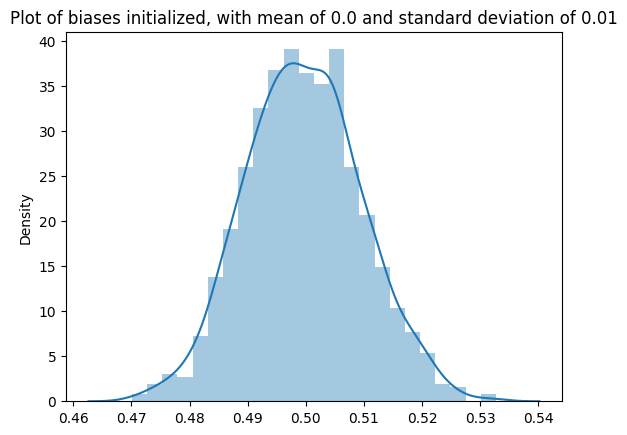

In [ ]:
# Intialize bias with mean 0.5 and standard deviation of 10^-2
bias = initialize_bias((1000,1))
sns.distplot(bias)
plt.title("Plot of biases initialized, with mean of 0.0 and standard deviation of 0.01")


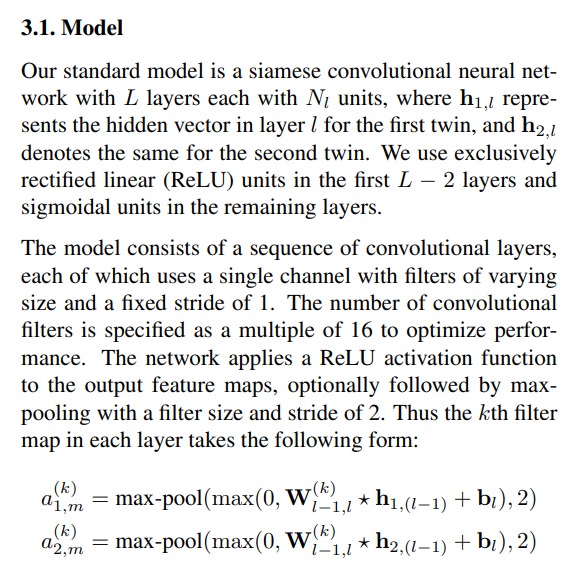

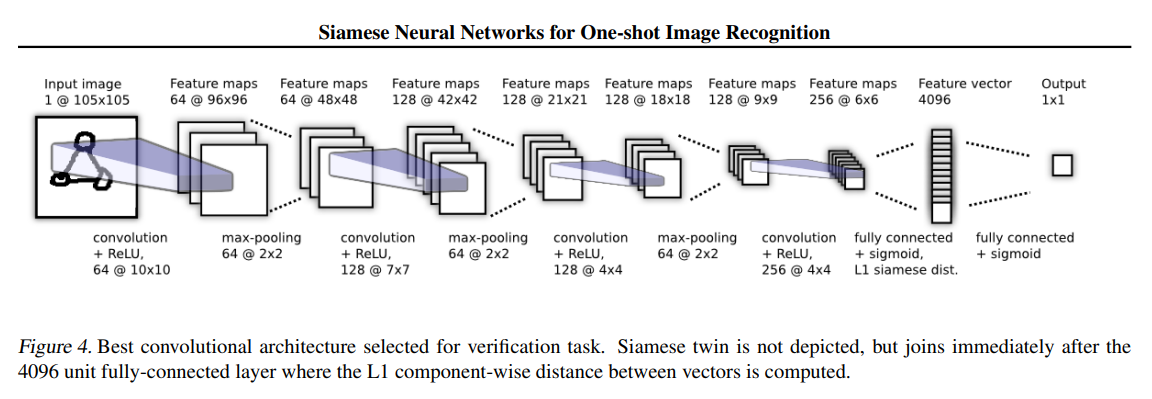

In [ ]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    return siamese_net


## Hyperparameter optimization

We used the beta version of Whetlab, a Bayesian optimization framework, to perform hyperparameter selection. For learning schedule and regularization hyperparameters, we set the layerwise learning rate


```
ηj ∈ [10−4, 10−1]

layer-wise momentum µj ∈ [0, 1]
and layer-wise L2 regularization penalty λj ∈ [0, 0.1]
```

For network hyperparameters, we let the size
of convolutional filters vary from 3x3 to 20x20, while the
number of convolutional filters in each layer varied from
16 to 256 using multiples of 16. Fully-connected layers
ranged from 128 to 4096 units, also in multiples of 16. We
set the optimizer to maximize one-shot validation set accuracy. The score assigned to a single Whetlab iteration was
the highest value of this metric found during any epoch.

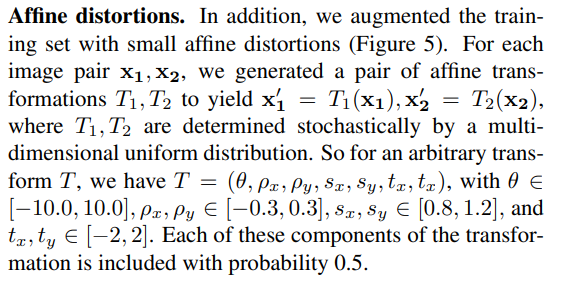

In [ ]:
model = get_siamese_model((105, 105, 1))
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 105, 105, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 105, 105, 1)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 4096)                 3894764   ['input_1[0][0]',             
                                                          8          'input_2[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 4096)                 0         ['sequential[0][0]',      

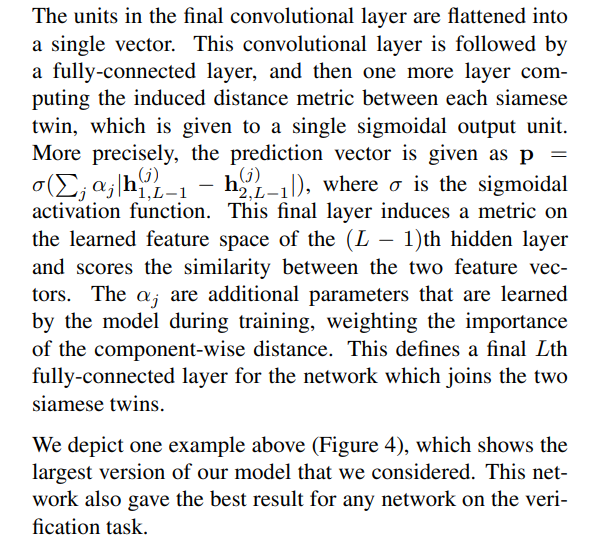

# Testar outros Learning Rates

Kaggle

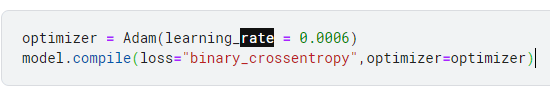

10/100 </br>
Got an average of **9.6%** 20 way one-shot learning accuracy </br>
20/100</br>
Got an average of **6.8%** 20 way one-shot learning accuracy </br>
30/100 </br>
Got an average of **10.8%** 20 way one-shot learning accuracy </br>
40/100</br>
Got an average of **4.4%** 20 way one-shot learning accuracy </br>
50/100 </br>
Got an average of **16.0%** 20 way one-shot learning accuracy </br>
60/100</br>
Got an average of **17.6%** 20 way one-shot learning accuracy </br>
70/100 </br>
Got an average of **6.4%** 20 way one-shot learning accuracy </br>

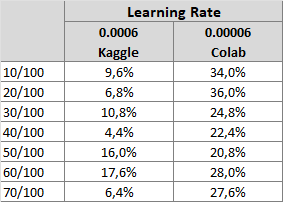

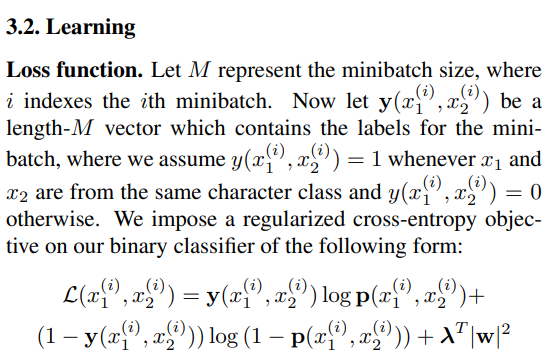

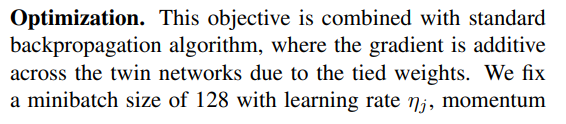

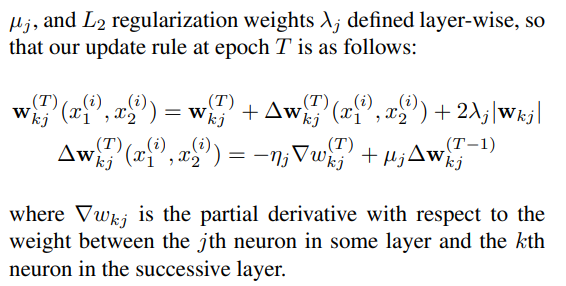

In [ ]:
optimizer = Adam(learning_rate = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

In [ ]:
def plot_images(path):
    """
        Plot all 20 samples of a particular character of a language
    """
    f, axarr = plt.subplots(5,4, figsize=(10,10))
    images_list = []
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        img = cv2.imread(image_path)
        images_list.append(img)
    for i in range(5):
        for j in range(4):
            axarr[i,j].imshow(images_list.pop())

/content/sample_data/images_background/Arcadian/character03/


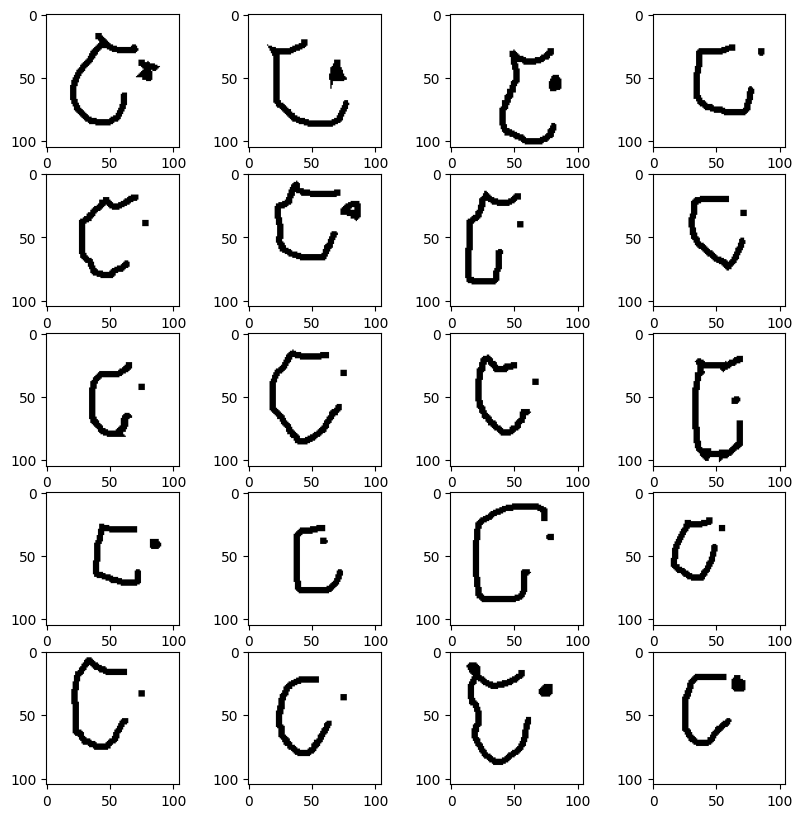

In [ ]:
print(os.path.join(data_path, 'images_background/Arcadian/character03/'))
plot_images(os.path.join(data_path, 'images_background/Arcadian/character03/'))
# print("Arcadian language, 20 samples of the third character.")

Korean language, 20 samples of the seventh character.


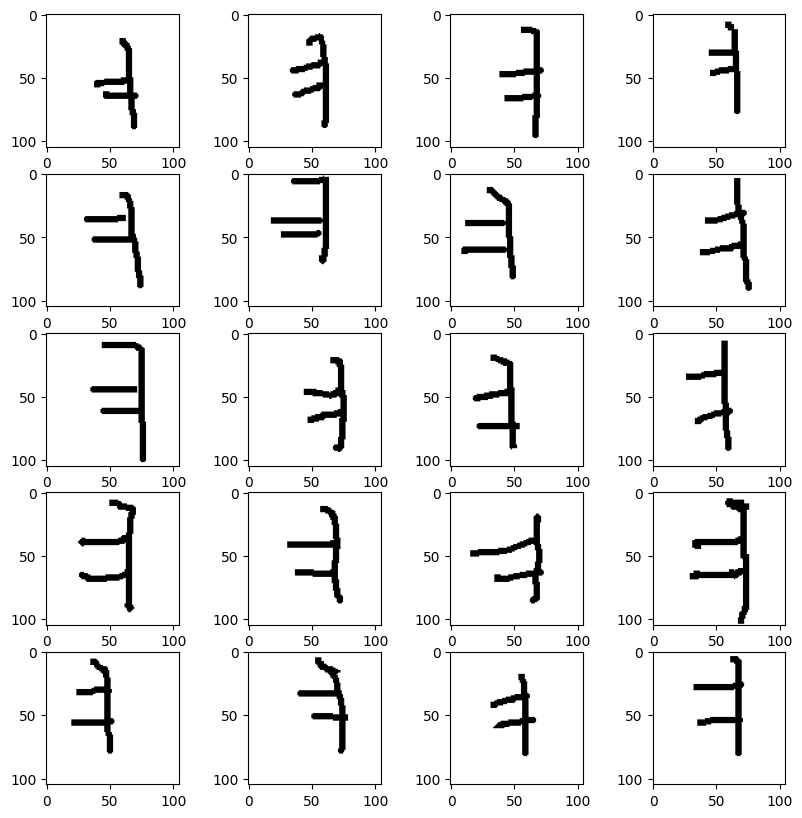

In [ ]:
plot_images(os.path.join(data_path, 'images_background/Korean/character07/'))
print("Korean language, 20 samples of the seventh character.")

In [ ]:
# from load_data import *

In [ ]:

with open(os.path.join(data_path, "train.pickle"), "rb") as f:
    (X, classes) = pickle.load(f)

with open(os.path.join(data_path, "val.pickle"), "rb") as f:
    (Xval, val_classes) = pickle.load(f)

print("Training alphabets: \n")
print(list(classes.keys()))
print("\nValidation alphabets:", end="\n\n")
print(list(val_classes.keys()))

Training alphabets: 

['Anglo-Saxon_Futhorc', 'Braille', 'Hebrew', 'N_Ko', 'Sanskrit', 'Gujarati', 'Armenian', 'Korean', 'Asomtavruli_(Georgian)', 'Futurama', 'Malay_(Jawi_-_Arabic)', 'Early_Aramaic', 'Burmese_(Myanmar)', 'Grantha', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Mkhedruli_(Georgian)', 'Arcadian', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)', 'Bengali', 'Japanese_(katakana)', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Syriac_(Estrangelo)', 'Greek', 'Cyrillic', 'Tagalog', 'Latin', 'Alphabet_of_the_Magi', 'Balinese', 'Tifinagh']

Validation alphabets:

['Aurek-Besh', 'Mongolian', 'Oriya', 'ULOG', 'Syriac_(Serto)', 'Atemayar_Qelisayer', 'Ge_ez', 'Kannada', 'Avesta', 'Atlantean', 'Old_Church_Slavonic_(Cyrillic)', 'Gurmukhi', 'Tengwar', 'Malayalam', 'Keble', 'Manipuri', 'Sylheti', 'Glagolitic', 'Angelic', 'Tibetan']


In [ ]:
class Siamese_Loader:
    """For loading batches and testing tasks to a siamese net"""
    def __init__(self, path, data_subsets = ["train", "val"]):
        self.data = {}
        self.categories = {}
        self.info = {}

        for name in data_subsets:
            file_path = os.path.join(path, name + ".pickle")
            print("loading data from {}".format(file_path))
            with open(file_path,"rb") as f:
                (X,c) = pickle.load(f)
                self.data[name] = X
                self.categories[name] = c

    # def get_batch(self,batch_size,s="train"):
    #     """Create batch of n pairs, half same class, half different class"""
    #     X=self.data[s]
    #     n_classes, n_examples, w, h, c = X.shape

    #     #randomly sample several classes to use in the batch
    #     categories = rng.choice(n_classes,size=(batch_size,),replace=False)
    #     #initialize 2 empty arrays for the input image batch
    #     pairs=[np.zeros((batch_size, h, w,1)) for i in range(2)]
    #     #initialize vector for the targets, and make one half of it '1's, so 2nd half of batch has same class
    #     targets=np.zeros((batch_size,))
    #     targets[batch_size//2:] = 1
    #     for i in range(batch_size):
    #         category = categories[i]
    #         idx_1 = rng.randint(0, n_examples)
    #         pairs[0][i,:,:,:] = X[category, idx_1].reshape(w, h, 1)
    #         idx_2 = rng.randint(0, n_examples)
    #         #pick images of same class for 1st half, different for 2nd
    #         if i >= batch_size // 2:
    #             category_2 = category
    #         else:
    #             #add a random number to the category modulo n classes to ensure 2nd image has
    #             # ..different category
    #             category_2 = (category + rng.randint(1,n_classes)) % n_classes
    #         pairs[1][i,:,:,:] = X[category_2,idx_2].reshape(w, h,1)
    #     return pairs, targets




    def get_batch(self, batch_size, s="train"):
        """Create batch of n pairs, half same class, half different class"""
        X = self.data[s]
        n_classes, n_examples, w, h, c = X.shape

        categories = rng.choice(n_classes, size=(batch_size,), replace=False)
        pairs = [np.zeros((batch_size, h, w, 1)) for _ in range(2)]
        targets = np.zeros((batch_size,))
        targets[batch_size//2:] = 1

        for i in range(batch_size):
            category = categories[i]
            idx_1 = rng.randint(0, n_examples)
            pairs[0][i, :, :, 0] = X[category, idx_1, :, :, 0]  # Seleciona apenas o primeiro canal
            idx_2 = rng.randint(0, n_examples)
            if i >= batch_size // 2:
                category_2 = category
            else:
                category_2 = (category + rng.randint(1, n_classes)) % n_classes

            pairs[1][i, :, :, 0] = X[category_2, idx_2, :, :, 0]  # Seleciona apenas o primeiro canal

        return pairs, targets

    def generate(self, batch_size, s="train"):
        """a generator for batches, so model.fit_generator can be used. """
        while True:
            pairs, targets = self.get_batch(batch_size,s)
            yield (pairs, targets)

    # def make_oneshot_task(self,N,s="val",language=None):
    #     """Create pairs of test image, support set for testing N way one-shot learning. """
    #     X = self.data[s]
    #     print("Shape de X antes de desempacotar:", X.shape)
    #     n_classes, n_examples, w, h, c = X.shape

    #     indices = rng.randint(0,n_examples,size=(N,))
    #     if language is not None:
    #         low, high = self.categories[s][language]
    #         if N > high - low:
    #             raise ValueError("This language ({}) has less than {} letters".format(language, N))
    #         categories = rng.choice(range(low,high),size=(N,),replace=False)

    #     else:#if no language specified just pick a bunch of random letters
    #         categories = rng.choice(range(n_classes),size=(N,),replace=False)
    #     true_category = categories[0]
    #     ex1, ex2 = rng.choice(n_examples,replace=False,size=(2,))
    #     test_image = np.asarray([X[true_category,ex1,:,:]]*N).reshape(N, w, h,1)
    #     support_set = X[categories,indices,:,:]
    #     support_set[0,:,:] = X[true_category,ex2]
    #     support_set = support_set.reshape(N, w, h,1)
    #     targets = np.zeros((N,))
    #     targets[0] = 1
    #     targets, test_image, support_set = shuffle(targets, test_image, support_set)
    #     pairs = [test_image,support_set]

    #     return pairs, targets



    def make_oneshot_task(self, N, s="val", language=None):
        """Create pairs of test image, support set for testing N way one-shot learning."""
        X = self.data[s]
        n_classes, n_examples, w, h, _ = X.shape  # Use '_' para ignorar a dimensão do canal

        indices = rng.randint(0, n_examples, size=(N,))
        if language is not None:
            low, high = self.categories[s][language]
            if N > high - low:
                raise ValueError("This language ({}) has less than {} letters".format(language, N))
            categories = rng.choice(range(low, high), size=(N,), replace=False)
        else:
            categories = rng.choice(range(n_classes), size=(N,), replace=False)

        true_category = categories[0]
        ex1, ex2 = rng.choice(n_examples, replace=False, size=(2,))
        test_image = np.asarray([X[true_category, ex1, :, :, 0]] * N).reshape(N, w, h, 1)  # Selecione apenas o primeiro canal
        support_set = X[categories, indices, :, :, 0]  # Selecione apenas o primeiro canal
        support_set[0, :, :] = X[true_category, ex2, :, :, 0]  # Selecione apenas o primeiro canal
        support_set = support_set.reshape(N, w, h, 1)  # Adicione uma dimensão de canal para consistência
        targets = np.zeros((N,))
        targets[0] = 1
        targets, test_image, support_set = shuffle(targets, test_image, support_set)
        pairs = [test_image, support_set]

        return pairs, targets

    # def test_oneshot(self,model,N,k,s="val",verbose=0):
    #     """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
    #     n_correct = 0
    #     if verbose:
    #         print("Evaluating model on {} random {} way one-shot learning tasks ... \n".format(k,N))
    #     for i in range(k):
    #         inputs, targets = self.make_oneshot_task(N,s)
    #         probs = model.predict(inputs)
    #         if np.argmax(probs) == np.argmax(targets):
    #             n_correct+=1
    #     percent_correct = (100.0*n_correct / k)
    #     if verbose:
    #         print("Got an average of {}% {} way one-shot learning accuracy \n".format(percent_correct,N))
    #     return percent_correct


# def test_oneshot(self, model, N, k, loader, s="val"):
#     """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
#     n_correct = 0
#     for i in range(k):
#         inputs, targets = loader.make_oneshot_task(N, s)  # assuming loader is an object that has make_oneshot_task method
#         probs = model.predict(inputs, verbose=0)  # Set verbose=0 to prevent printing the output of the prediction
#         if np.argmax(probs) == np.argmax(targets):
#             n_correct += 1
#     percent_correct = (100.0 * n_correct / k)
#     return percent_correct


    def test_oneshot(self, model, N, k, s="val", verbose=0):
        """Test average N way oneshot learning accuracy of a siamese neural net over k one-shot tasks"""
        n_correct = 0
        for i in range(k):
            inputs, targets = self.make_oneshot_task(N, s)
            probs = model.predict(inputs, verbose=0)  # Set verbose=0 to prevent printing the output of the prediction
            if np.argmax(probs) == np.argmax(targets):
                n_correct += 1
        percent_correct = (100.0 * n_correct / k)
        if verbose:
            print("Got an average of {}% {} way one-shot learning accuracy".format(percent_correct, N))
        return percent_correct

    def train(self, model, epochs, verbosity):
        model.fit_generator(self.generate(batch_size))


loader = Siamese_Loader(data_path)

loading data from /content/sample_data/train.pickle
loading data from /content/sample_data/val.pickle


In [ ]:
def concat_images(X):
    """Concatenates a bunch of images into a big matrix for plotting purposes."""
    nc, h , w, _ = X.shape
    X = X.reshape(nc, h, w)
    n = np.ceil(np.sqrt(nc)).astype("int8")
    img = np.zeros((n*w,n*h))
    x = 0
    y = 0
    for example in range(nc):
        img[x*w:(x+1)*w,y*h:(y+1)*h] = X[example]
        y += 1
        if y >= n:
            y = 0
            x += 1
    return img


def plot_oneshot_task(pairs):
    fig,(ax1,ax2) = plt.subplots(2)
    ax1.matshow(pairs[0][0].reshape(105,105), cmap='gray')
    img = concat_images(pairs[1])
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax2.matshow(img,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.show()


In [ ]:
#     def make_oneshot_task(self,N,s="val",language=None):
pairs, targets = loader.make_oneshot_task(20,"train","Japanese_(katakana)")

# Shape de X antes de desempacotar: (964, 20, 105, 105, 3)

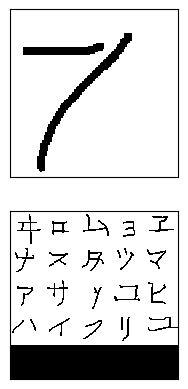

In [ ]:
plot_oneshot_task(pairs)

In [ ]:
evaluate_every = 10 # interval for evaluating on one-shot tasks
loss_every = 20 # interval for printing loss (iterations)
batch_size = 32
n_iter = 100 # No código estava 20.000
N_way = 20 # how many classes for testing one-shot tasks>
n_val = 250 # how many one-shot tasks to validate on?
best = -1
weights_path = os.path.join(data_path, "model_weights.h5")


# print("Starting training process!")
# print("-------------------------------------")
# t_start = time.time()
# for i in range(1, n_iter):
#     (inputs,targets)=loader.get_batch(batch_size)
#     loss=model.train_on_batch(inputs,targets)
#     print("\n ------------- \n")
#     print("Loss: {0}".format(loss))
#     if i % evaluate_every == 0:
#         # Testando contagem
#         print("{0}/{1} - Time for {2} iterations: {3}".format(i, n_iter, i, time.time() - t_start))
#         val_acc = loader.test_oneshot(model, N_way, n_val, verbose=False)

#         # print("Time for {0} iterations: {1}".format(i, time.time()-t_start))
#         # val_acc = loader.test_oneshot(model,N_way,n_val,verbose=True)

#         if val_acc >= best:
#             print("Current best: {0}, previous best: {1}".format(val_acc, best))
#             print("Saving weights to: {0} \n".format(weights_path))
#             model.save_weights(weights_path)
#             best=val_acc

#     if i % loss_every == 0:
#         print("iteration {}, training loss: {:.2f},".format(i,loss))



print("Starting training process!")
print("-------------------------------------")
t_start = time.time()
for i in range(1, n_iter):
    (inputs, targets) = loader.get_batch(batch_size)
    loss = model.train_on_batch(inputs, targets)
    if i % evaluate_every == 0:
        val_acc = test_oneshot(model, N_way, n_val, loader)  # pass the loader to test_oneshot
        if val_acc >= best:
            print(f"[{i}] Time: {time.time() - t_start:.2f}s - Best One-shot Accuracy: {val_acc:.2f}% (improvement)")
            model.save_weights(weights_path)
            best = val_acc
    if i % loss_every == 0:
        print(f"Iteration {i} - Training Loss: {loss:.2f}")


Starting training process!
-------------------------------------
[10] Time: 22.02s - Best One-shot Accuracy: 23.20% (improvement)
Iteration 20 - Training Loss: 3.18
[30] Time: 67.08s - Best One-shot Accuracy: 28.80% (improvement)
Iteration 40 - Training Loss: 2.94
[60] Time: 134.37s - Best One-shot Accuracy: 30.00% (improvement)
Iteration 60 - Training Loss: 2.99
Iteration 80 - Training Loss: 2.65


In [ ]:
weights_path_2 = os.path.join(data_path, "model_weights.h5")
model.load_weights(weights_path_2)

Evaluating nearest neighbour on 450 unique 1 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 3 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 5 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 7 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 9 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 11 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 13 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 15 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 17 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 19 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 21 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 23 way one-shot learning tasks ...
Evaluating nearest neighbour on 450 unique 25 way one-shot learning t

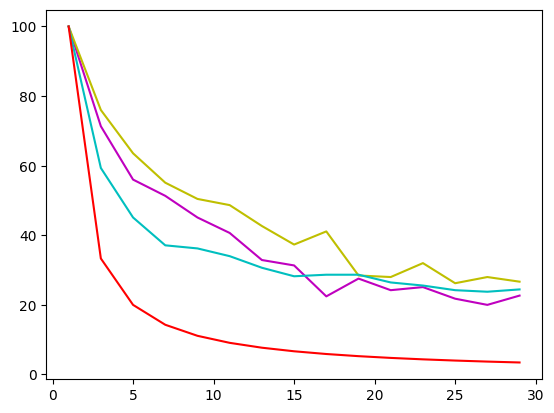

In [ ]:
def nearest_neighbour_correct(pairs,targets):
    """returns 1 if nearest neighbour gets the correct answer for a one-shot task
        given by (pairs, targets)"""
    L2_distances = np.zeros_like(targets)
    for i in range(len(targets)):
        L2_distances[i] = np.sum(np.sqrt(pairs[0][i]**2 - pairs[1][i]**2))
    if np.argmin(L2_distances) == np.argmax(targets):
        return 1
    return 0


def test_nn_accuracy(N_ways,n_trials,loader):
    """Returns accuracy of one shot """
    print("Evaluating nearest neighbour on {} unique {} way one-shot learning tasks ...".format(n_trials,N_ways))

    n_right = 0

    for i in range(n_trials):
        pairs,targets = loader.make_oneshot_task(N_ways,"val")
        correct = nearest_neighbour_correct(pairs,targets)
        n_right += correct
    return 100.0 * n_right / n_trials


ways = np.arange(1, 30, 2)
resume =  False
val_accs, train_accs,nn_accs = [], [], []
trials = 450
for N in ways:
    val_accs.append(loader.test_oneshot(model, N,trials, "val", verbose=False))
    train_accs.append(loader.test_oneshot(model, N,trials, "train", verbose=False))
    nn_accs.append(test_nn_accuracy(N,trials, loader))

#plot the accuracy vs num categories for each
plt.plot(ways, val_accs, "m")
plt.plot(ways, train_accs, "y")
plt.plot(ways, nn_accs, "c")

plt.plot(ways,100.0/ways,"r")
plt.show()

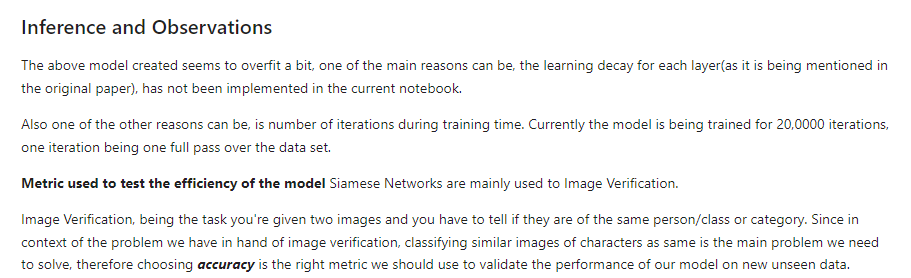

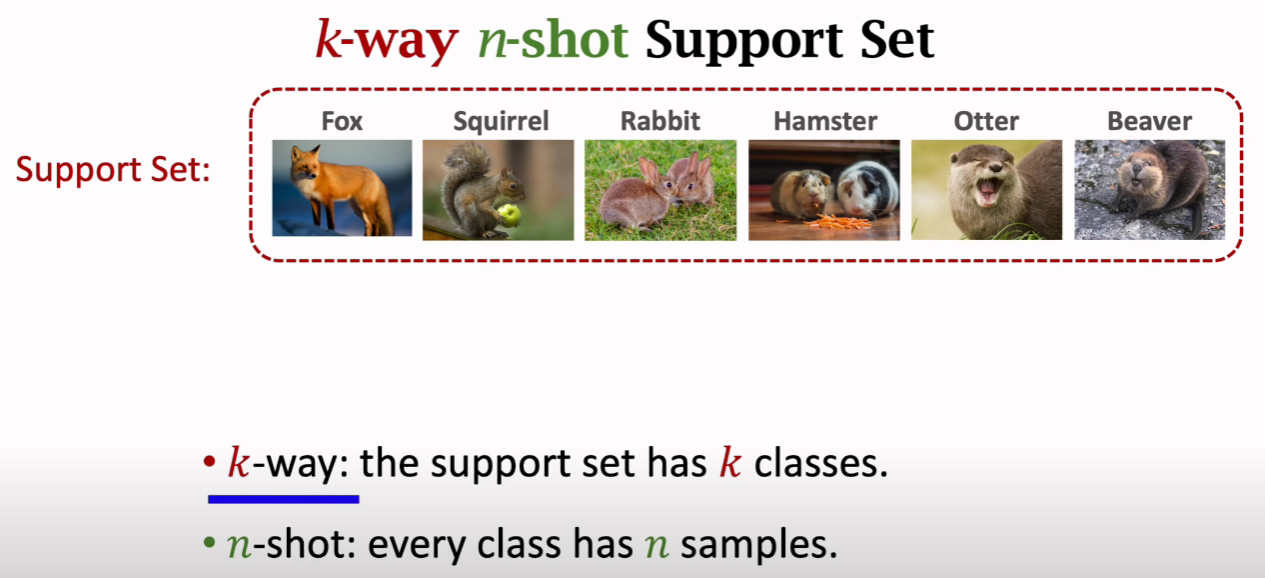

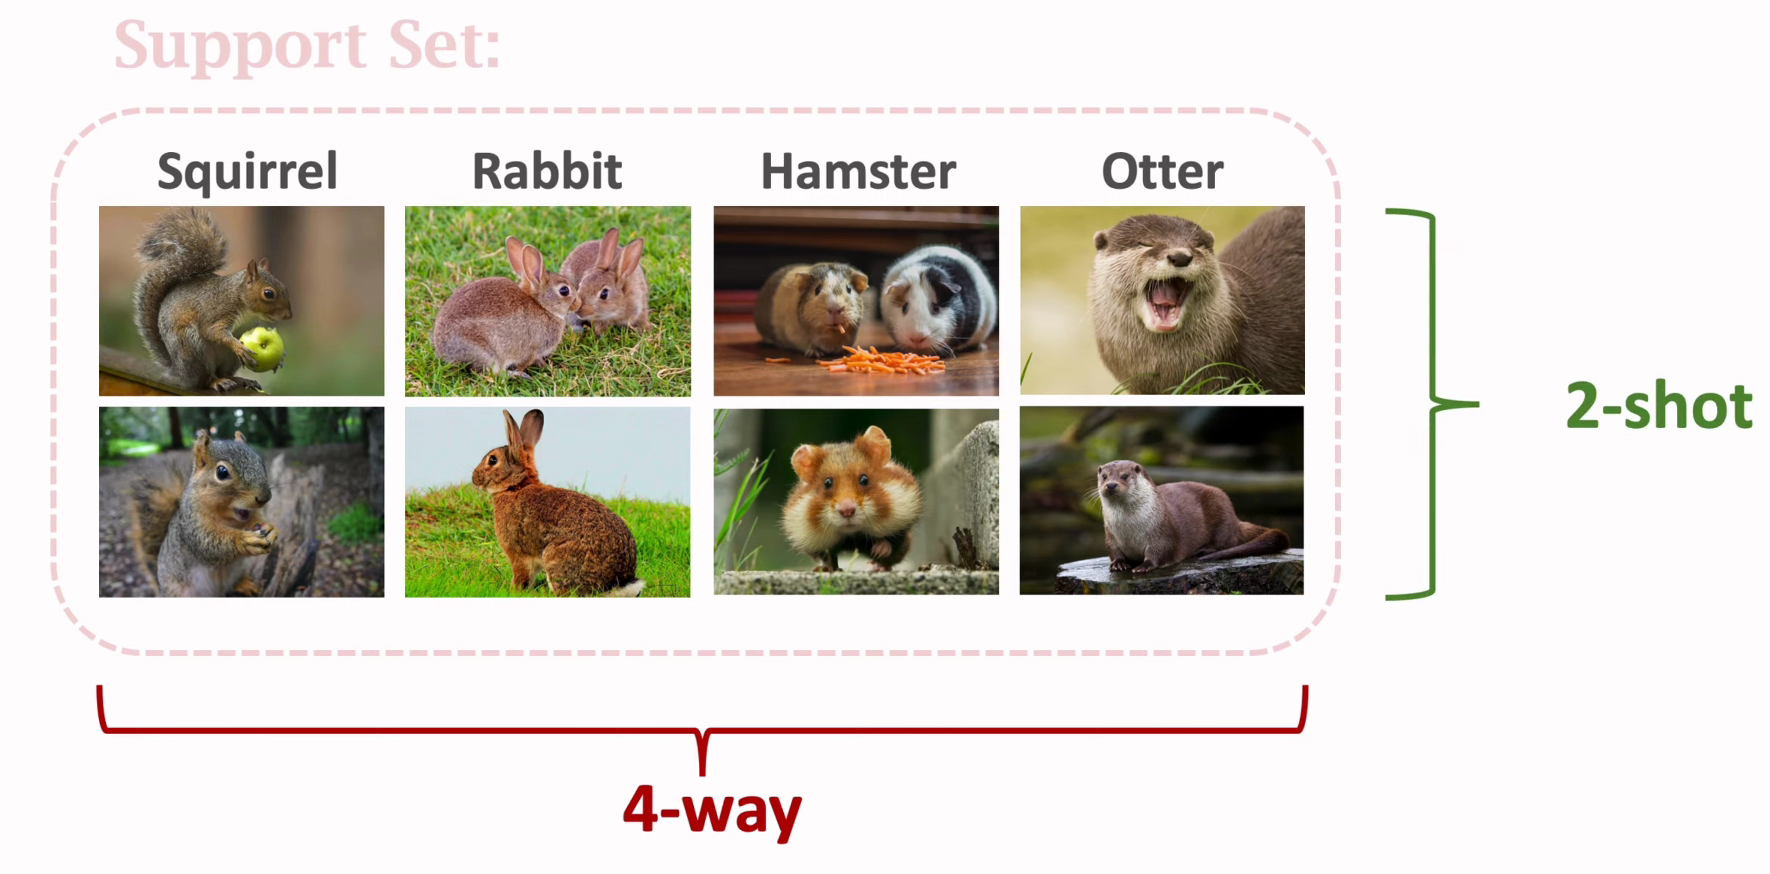

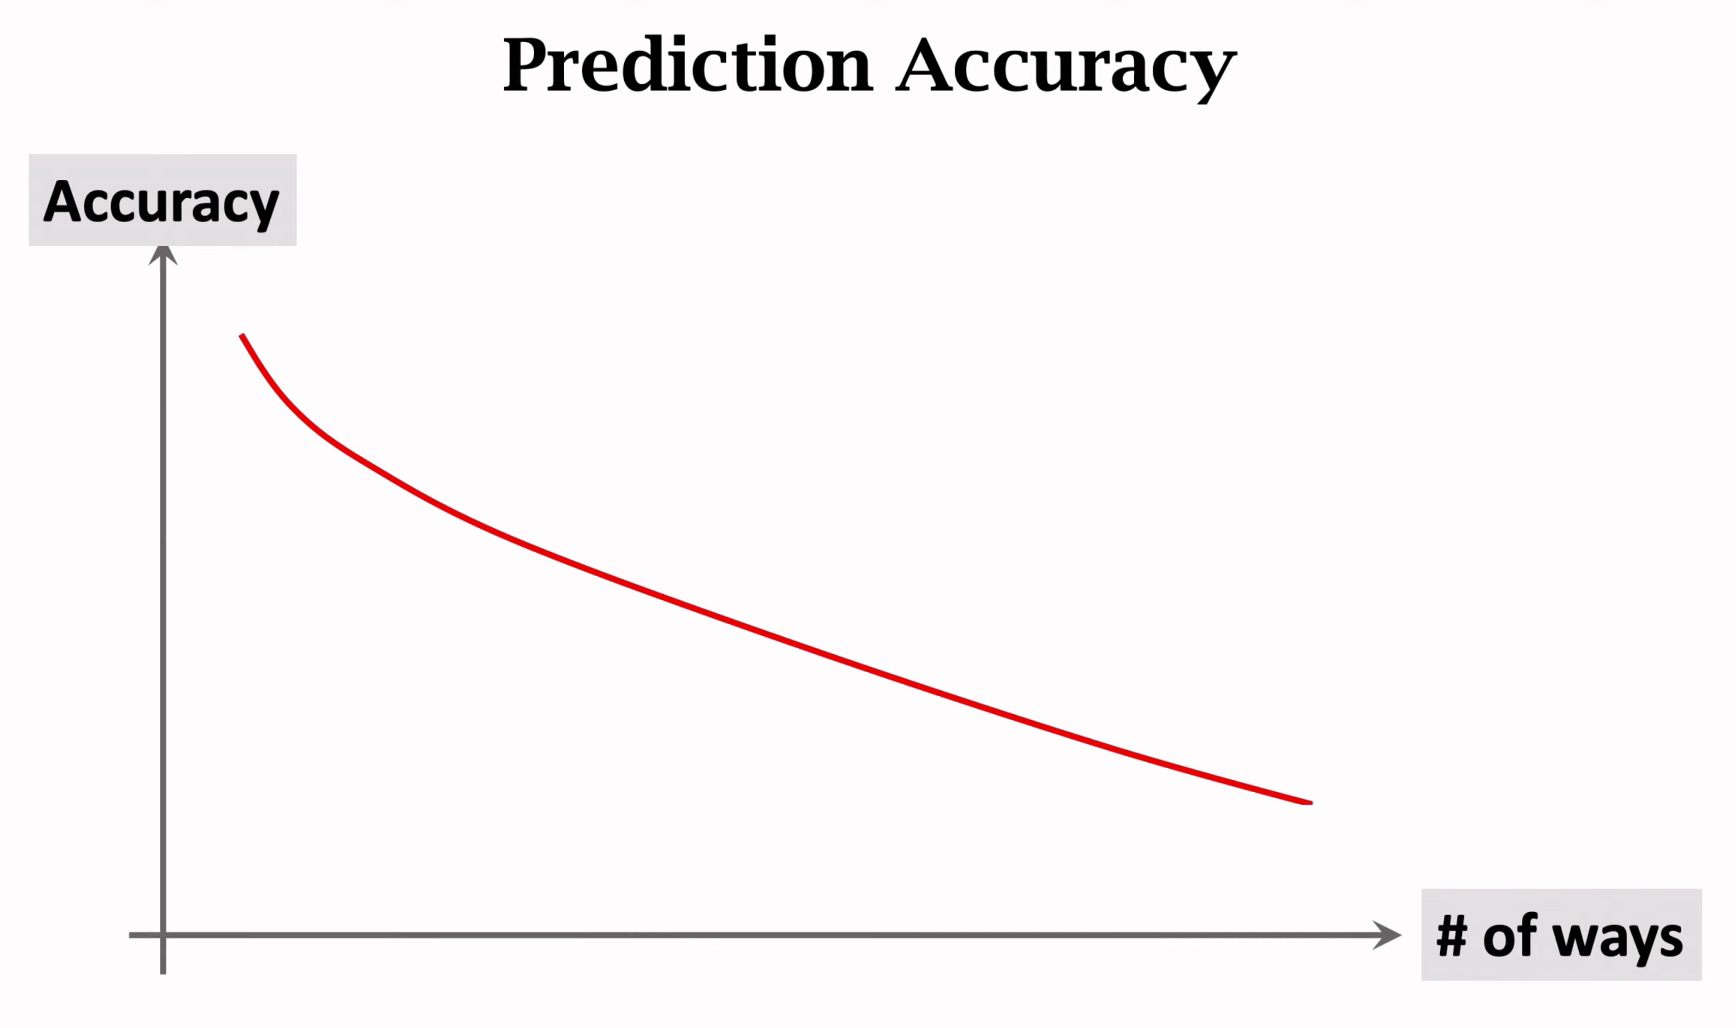

# Kaggle

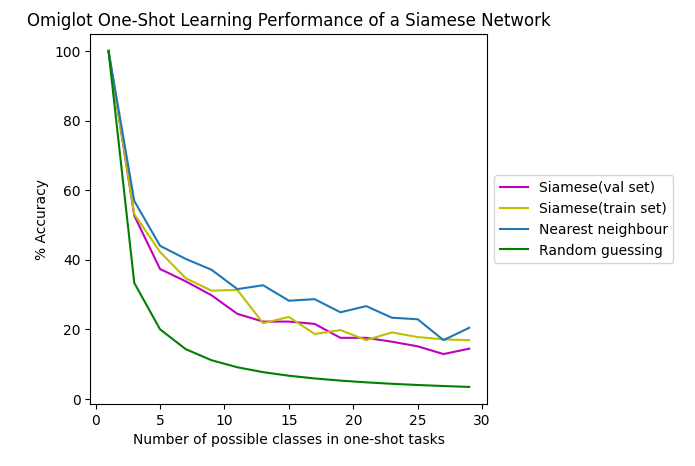

In [ ]:
fig,ax = plt.subplots(1)
ax.plot(ways, val_accs, "m", label="Siamese(val set)")
ax.plot(ways, train_accs, "y", label="Siamese(train set)")
plt.plot(ways, nn_accs, label="Nearest neighbour")

ax.plot(ways, 100.0/ways, "g", label="Random guessing")
plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("% Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
inputs,targets = loader.make_oneshot_task(20, "val")
plt.show()

plot_oneshot_task(inputs)